# Run all the experiments for the MRMR paper

Performs all the experiments and generates the figures.

In [1]:
import sys
sys.path.append("../..")
from exp_run_config import Config
Config.PROJECTNAME = "WaterBerryFarms"

import pathlib
from pprint import pprint
import gzip as compress
import pickle
import matplotlib.pyplot as plt
import copy
#import matplotlib
#import numpy as np

# import wbf_figures
from wbf_simulate import run_nrobot1day
from mrmr_graphics import load_back_results, show_robot_with_plan, show_robot_trajectories_and_detections, count_detections, show_agentwise_detections, show_comparative_detections

In [2]:
experiment = "mrmr"
lookup = {"mrmr-clustered-1pio-2con": "MRMR", "mrmr-clustered-3lawnmowers": "MRSE", "mrmr-clustered-3random": "MRRW", "mrmr-unclustered-1pio-2con" : "MRMR",
"mrmr-unclustered-3lawnmowers": "MRSE", "mrmr-unclustered-3random": "MRRW"}

In [3]:
# the experiment for this notebook
expall = Config().get_experiment(experiment, "mrmr_all")

for run in expall["allruns"]:
    exp = Config().get_experiment(experiment, run)
    pprint(exp)
    run_nrobot1day(exp)

***ExpRun**: Loading pointer config file:
	C:\Users\lboloni\.config\WaterBerryFarms\mainsettings.yaml
***ExpRun**: Loading machine-specific config file:
	G:\My Drive\LotziStudy\Code\PackageTracking\WaterBerryFarms\settings\WBF-config-LotziYoga.yaml
***ExpRun**: Configuration for exp/run: mrmr/mrmr_all successfully loaded
***ExpRun**: Configuration for exp/run: mrmr/mrmr-clustered-3random successfully loaded
Experiment:
    data_dir: C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr-clustered-3random
    exp_environment: environment
    exp_estimator: estimator
    exp_run_sys_indep_file: C:\Users\lboloni\Documents\Code\_Checkouts\WBF\WaterberryFarms\experiment_configs\mrmr\mrmr-clustered-3random.yaml
    exp_score: score
    experiment_name: mrmr
    im_resolution: 10
    name: 3 random waypoint
    robots:
    - exp-policy: policy
      exp-policy-extra-parameters:
        budget: 1000
        name: rwp-1
        seed: 1
      name: robot-1
      run-policy: rando

In [4]:
expall["allruns"]

['mrmr-clustered-3random',
 'mrmr-clustered-3lawnmowers',
 'mrmr-clustered-1pio-2con',
 'mrmr-unclustered-3random',
 'mrmr-unclustered-3lawnmowers',
 'mrmr-unclustered-1pio-2con']

In [5]:
all_results = load_back_results(experiment, expall["allruns"])
all_results.keys()

  0%|          | 0/6 [00:00<?, ?it/s]

***ExpRun**: Configuration for exp/run: mrmr/mrmr-clustered-3random successfully loaded


 17%|█▋        | 1/6 [00:00<00:00,  8.02it/s]

***ExpRun**: Configuration for exp/run: mrmr/mrmr-clustered-3lawnmowers successfully loaded


 33%|███▎      | 2/6 [00:00<00:00,  5.38it/s]

***ExpRun**: Configuration for exp/run: mrmr/mrmr-clustered-1pio-2con successfully loaded


 50%|█████     | 3/6 [00:00<00:00,  6.02it/s]

***ExpRun**: Configuration for exp/run: mrmr/mrmr-unclustered-3random successfully loaded


 67%|██████▋   | 4/6 [00:00<00:00,  6.87it/s]

***ExpRun**: Configuration for exp/run: mrmr/mrmr-unclustered-3lawnmowers successfully loaded


 83%|████████▎ | 5/6 [00:00<00:00,  6.53it/s]

***ExpRun**: Configuration for exp/run: mrmr/mrmr-unclustered-1pio-2con successfully loaded


100%|██████████| 6/6 [00:01<00:00,  5.38it/s]


dict_keys(['mrmr-clustered-3random', 'mrmr-clustered-3lawnmowers', 'mrmr-clustered-1pio-2con', 'mrmr-unclustered-3random', 'mrmr-unclustered-3lawnmowers', 'mrmr-unclustered-1pio-2con'])

### Visualize the replanning process
* for all the mrmr scenarios, for the contractor agents
* for all the replanning points (which are the indexes of the oldplans dictionary)
* create a figure
* visualize the observations to that time with a continuous line
* visualize the rest of the plan from the oldplans


Last observations: {'x': 30, 'y': 31, 'time': 645, 'TYLCV': {'x': 30, 'y': 31, 'time': 645, 'value': np.float64(1.0)}, 'CCR': {'x': 30, 'y': 31, 'time': 645, 'value': np.float64(0.0)}, 'Soil': {'x': 30, 'y': 31, 'time': 645, 'value': np.float64(0.0)}, 'name': 'mrmr-contractor-2'}
Done saving to C:\Users\lboloni\Documents\Code\_TempData\WBF\ExperimentData\mrmr\mrmr_all\plans_mrmr-clustered-1pio-2con_con-2_646.0.pdf


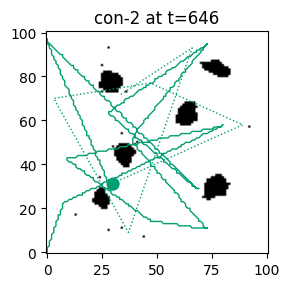

In [6]:
scenario = "mrmr-clustered-1pio-2con"
results = all_results[scenario]
robotno = 2
oldplans = results["robots"][robotno].oldplans
#for t in oldplans:
#    print(t)
show_robot_with_plan(expall, scenario, results, robotno, 646.0)

In [ ]:
for scenario in all_results:
    if "1pio" not in scenario: continue
    results = all_results[scenario]
    for i, robot in enumerate(results["robots"]):
        if "con" in robot.name:
            print(robot.name)
            # show the robot at every
            oldplans = copy.copy(robot.oldplans)
            for t in oldplans:
                print(t)
                show_robot_with_plan(expall, scenario, results, i, t)

con-1


AttributeError: 'dict' object has no attribute 'append'

### Figures for detections
For all the values in all_results, create a visual graph with the detections, and a bar graph with all the agents

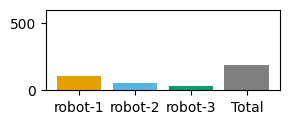

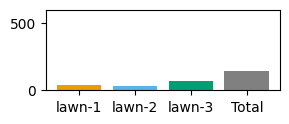

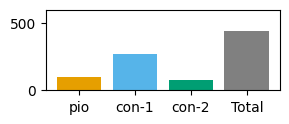

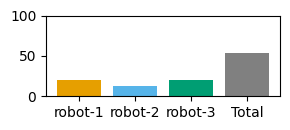

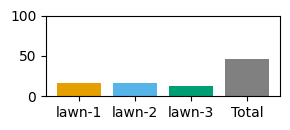

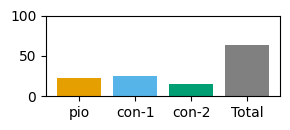

In [ ]:
#ROBOT_COLORS = ["red", "blue", "green"]
ROBOT_COLORS = ["#E69F00", "#56B4E9", "#009E73"]
for scenario in all_results:
    results = all_results[scenario]
    name = scenario
    show_robot_trajectories_and_detections(expall, name, results, robot_colors=ROBOT_COLORS, lookup=lookup)    
    show_agentwise_detections(expall, name, results, robot_colors = ROBOT_COLORS)

### Comparison bar graphs 
* compare the unclustered and clustered cases 
* create comparison graphs

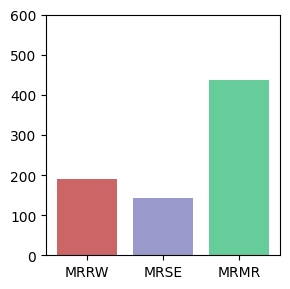

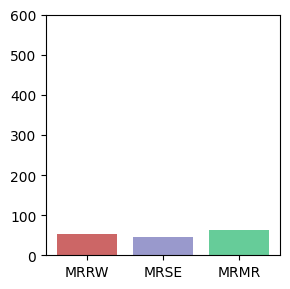

In [ ]:
name_colors = ["#CC6666", "#9999CC", "#66CC99"]
for group in ["clustered-runs", "unclustered-runs"]:
    values = {}
    for scenario in expall[group]:
        results = all_results[scenario]
        total = 0
        for i, robot in enumerate(results["robots"]):
            detections = count_detections(results, i)
            total += detections
        values[scenario] = total
    show_comparative_detections(expall, f"comparative-{group}", values, lookup, name_colors)